In [1]:
from rmn import *
from img_functions import *
import torch
import pandas as pd
from torchsummary import summary
from pytorch_grad_cam import GradCAM, GradCAMElementWise, GradCAMPlusPlus
from pytorch_grad_cam.utils.image import show_cam_on_image

c:\Users\terai\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
str1 = '1e2cb139585708950d34bc2b49bc3dc8260f96345f1582ef2f239cc2.jpg'
str2 = '7369ba53ada7a88db961ef55951754317a07a42c9921f92ea997776b.jpeg'
str3 = '030df3cae0f09d8d74ea4425189cf7e308518df67d0c8e08842c4adf.jpg'

dfET = pd.read_csv(csvET,sep=';')
for k in range(50):
    # open ET results for participant k+1
    if k<=8 :
        f = ".\\datasets\\ET_collected_labels\\et_ "+str(k+1)+".csv"
    elif k!=33 :
        f = ".\\datasets\\ET_collected_labels\\et_"+str(k+1)+".csv"
    df = pd.read_csv(f,sep=',',encoding='latin-1',header=None)
    if k!=33 :
        print("k=",k+1,df.loc[df[0]==str2].values[0])

k= 1 ['7369ba53ada7a88db961ef55951754317a07a42c9921f92ea997776b.jpeg'
 'Surprise']
k= 2 ['7369ba53ada7a88db961ef55951754317a07a42c9921f92ea997776b.jpeg'
 'Surprise']
k= 3 ['7369ba53ada7a88db961ef55951754317a07a42c9921f92ea997776b.jpeg'
 'Surprise']
k= 4 ['7369ba53ada7a88db961ef55951754317a07a42c9921f92ea997776b.jpeg'
 'Surprise']
k= 5 ['7369ba53ada7a88db961ef55951754317a07a42c9921f92ea997776b.jpeg' 'Colère']
k= 6 ['7369ba53ada7a88db961ef55951754317a07a42c9921f92ea997776b.jpeg'
 'Surprise']
k= 7 ['7369ba53ada7a88db961ef55951754317a07a42c9921f92ea997776b.jpeg'
 'Surprise']
k= 8 ['7369ba53ada7a88db961ef55951754317a07a42c9921f92ea997776b.jpeg'
 'Surprise']
k= 9 ['7369ba53ada7a88db961ef55951754317a07a42c9921f92ea997776b.jpeg'
 'Surprise']
k= 10 ['7369ba53ada7a88db961ef55951754317a07a42c9921f92ea997776b.jpeg'
 'Surprise']
k= 11 ['7369ba53ada7a88db961ef55951754317a07a42c9921f92ea997776b.jpeg'
 'Surprise']
k= 12 ['7369ba53ada7a88db961ef55951754317a07a42c9921f92ea997776b.jpeg'
 'Surprise']
k= 1

In [ ]:
# store scores in df ??
def all_scores(csv_path,nb_people=50):

    """
    Pour chaque image :
        Créer liste de taille 4
        Pour chaque personne :
            Trouver image dans dataframe :
                Stocker emotion => +1 dans la liste à l'indice correspondant à emotion
    """
    
    dfET = pd.read_csv(csv_path,sep=';')
    imgID_series = dfET['ImageID']
    dfAllscores = pd.DataFrame(columns=['ImageID','Happiness','Sadness','Surprise','Anger'])
    data =  ['img_name',0,0,0,1]
    # dfAllscores = dfAllscores.append(['img_name',0,0,0,1], ignore_index=True)
    dfAllscores.loc[len(dfAllscores)] = data
    print(dfAllscores.head())
    for i in range(imgID_series.size) :
        img_name = imgID_series[i]
        list = [0,0,0,0]
        for k in range(nb_people):
            # open ET results for participant k+1
            if k<=8 :
                f = ".\\datasets\\ET_collected_labels\\et_ "+str(k+1)+".csv"
            elif k!=33 :
                f = ".\\datasets\\ET_collected_labels\\et_"+str(k+1)+".csv"
            df = pd.read_csv(f,sep=',',encoding='latin-1',header=None)
            # get emotion predicted by partipant
            if k!=33 :
                emo = df.loc[df[0]==img_name][1].values[0]
                if emo=='Joie':
                    list[0]+=1
                elif emo=='Tristesse':
                    list[1]+=1
                elif emo=='Surprise':
                    list[2]+=1
                elif emo=='Colère':
                    list[3]+=1
        list_all.append(np.array(list))
        print(i,img_name,list)
    return np.array(list_all)

In [ ]:
def load(csvBV, BVpath, csvET, ETpath):

    dfBV = pd.read_csv(csvBV,sep=';')
    dfET = pd.read_csv(csvET,sep=';')
    # get indexes of ET images that were not also used in BV dataset
    scompare = dfET['ImageID'].isin(dfBV['Original_img']) # True -> image is common to both series | False -> image is unique to ET series
    remaining_imgs = np.array(scompare[scompare == False].index[:])

    # create new dataframe to store labels
    dfAll = dfBV.drop(columns=['New_name'])
    dfAll = dfAll.rename(columns={"Original_img": "ImageID"})
    dfAll = dfAll[['ImageID','GTExpression','GTEmotion']]

    img_list = []
    # load all BV images
    for i in range(dfBV['New_name'].size) :
        f = dfBV['New_name'][i]
        img = Image.open(os.path.join(BVpath,f))
        img_list.append(img)
    # load only relevant ET images
    for idx in remaining_imgs :
        # select row by index and insert into label dataframe
        dfAll = dfAll.append(dfET.iloc[idx], ignore_index=True)
        # load image
        f = dfET['ImageID'][idx]
        img = Image.open(os.path.join(ETpath,f))
        img = remove_pad_single(img)
        img_list.append(img)

    return np.array(img_list), dfAll

In [4]:
## Goal : generate new csv to store BV labels
import csv

csvA = ".\\datasets\\correspondance_list.csv"
csvB = ".\\datasets\\BV_labels.csv"
path = ".\\datasets\\BV"

dfA = pd.read_csv(csvA,sep=',') # correspondance
dfB = pd.read_csv(csvB,sep=';') # BV labels

csvC_header = ['Original_img','New_name','GTEmotion','GTExpression']
with open('BV_labels_corrected.csv', 'w', encoding='UTF8',newline='') as file:
    writer = csv.writer(file,delimiter=';')
    writer.writerow(csvC_header)
    for i in range(dfA['New_name'].size):
        # correct original img name
        new_name = dfA['New_name'][i]
        orig_img = dfA['Original_img'][i]
        # add emotion label
        idx = dfB.loc[dfB['New_name'] == new_name].index[0] # get index in dfB where new_name matches
        emo = dfB['GTEmotion'][idx]
        exp = dfB['GTExpression'][idx]
        writer.writerow([orig_img,new_name,emo,exp])

In [2]:
csvBVuntouched = ".\\datasets\\BV_labels_untouched.csv"
BVpath = ".\\datasets\\BV"
csvETuntouched = ".\\datasets\\ET_labels_untouched.csv"
ETpath = ".\\datasets\\ET"
csvET = ".\\datasets\\ET_labels.csv"
csvBV = ".\\datasets\\BV_labels.csv"

dfBV = pd.read_csv(csvBV,sep=';')
dfET = pd.read_csv(csvET,sep=';')
dfBVu = pd.read_csv(csvBVuntouched,sep=';')
dfETu = pd.read_csv(csvETuntouched,sep=';')

imgs_untouched, df_labels_untouched = load_all(csvBVuntouched,BVpath,csvETuntouched,ETpath)
imgs, df_labels = load_all(csvBV,BVpath,csvET,ETpath)

201 images successfully loaded
Created dataframe for labels
200 images successfully loaded
Created dataframe for labels


In [46]:
df_labels.shape

(280, 4)

In [3]:
print(dfBV.loc[dfBV['GTExpression'] == 6].shape)
print(dfBV.loc[dfBV['GTExpression'] == 1].shape)
print(dfBV.loc[dfBV['GTExpression'] == 2].shape)
print(dfBV.loc[dfBV['GTExpression'] == 3].shape)

print(dfET.loc[dfET['GTExpression'] == 6].shape)
print(dfET.loc[dfET['GTExpression'] == 1].shape)
print(dfET.loc[dfET['GTExpression'] == 2].shape)
print(dfET.loc[dfET['GTExpression'] == 3].shape)

(47, 4)
(37, 4)
(35, 4)
(41, 4)
(30, 3)
(30, 3)
(30, 3)
(30, 3)


In [115]:
print(dfBVu.loc[dfBVu['GTExpression'] == 6].shape)
print(dfBVu.loc[dfBVu['GTExpression'] == 1].shape)
print(dfBVu.loc[dfBVu['GTExpression'] == 2].shape)
print(dfBVu.loc[dfBVu['GTExpression'] == 3].shape)

print(dfETu.loc[dfETu['GTExpression'] == 6].shape)
print(dfETu.loc[dfETu['GTExpression'] == 1].shape)
print(dfETu.loc[dfETu['GTExpression'] == 2].shape)
print(dfETu.loc[dfETu['GTExpression'] == 3].shape)

(47, 4)
(37, 4)
(35, 4)
(41, 4)
(30, 3)
(30, 3)
(30, 3)
(30, 3)


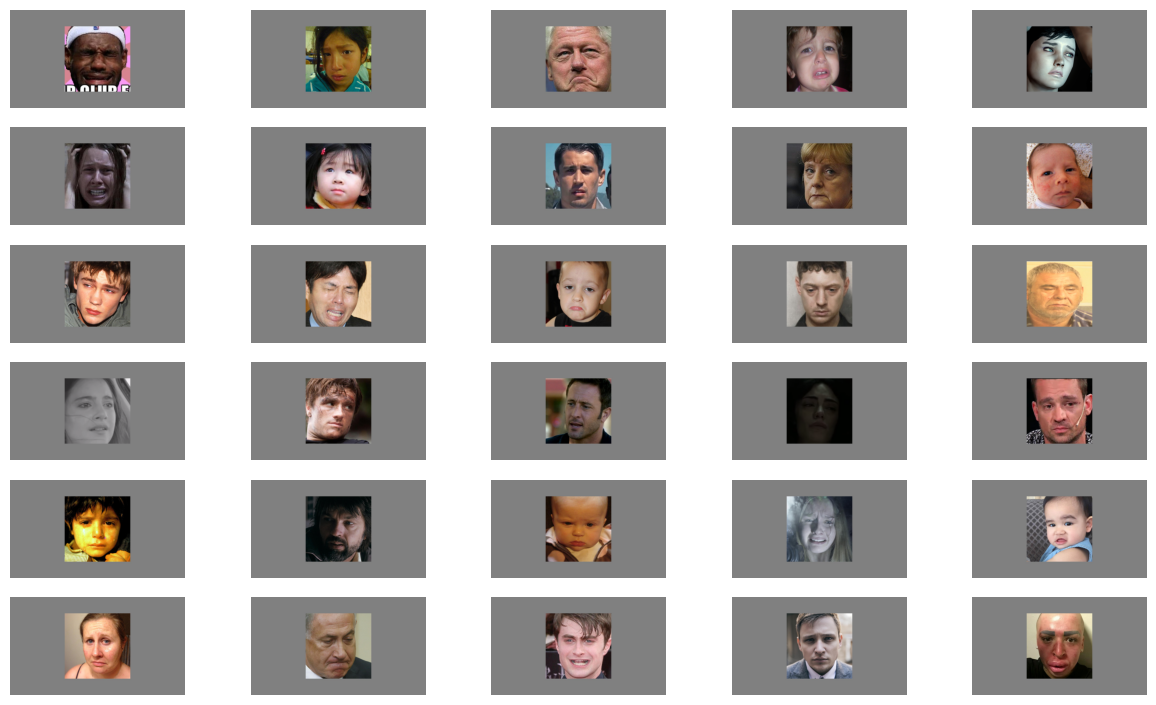

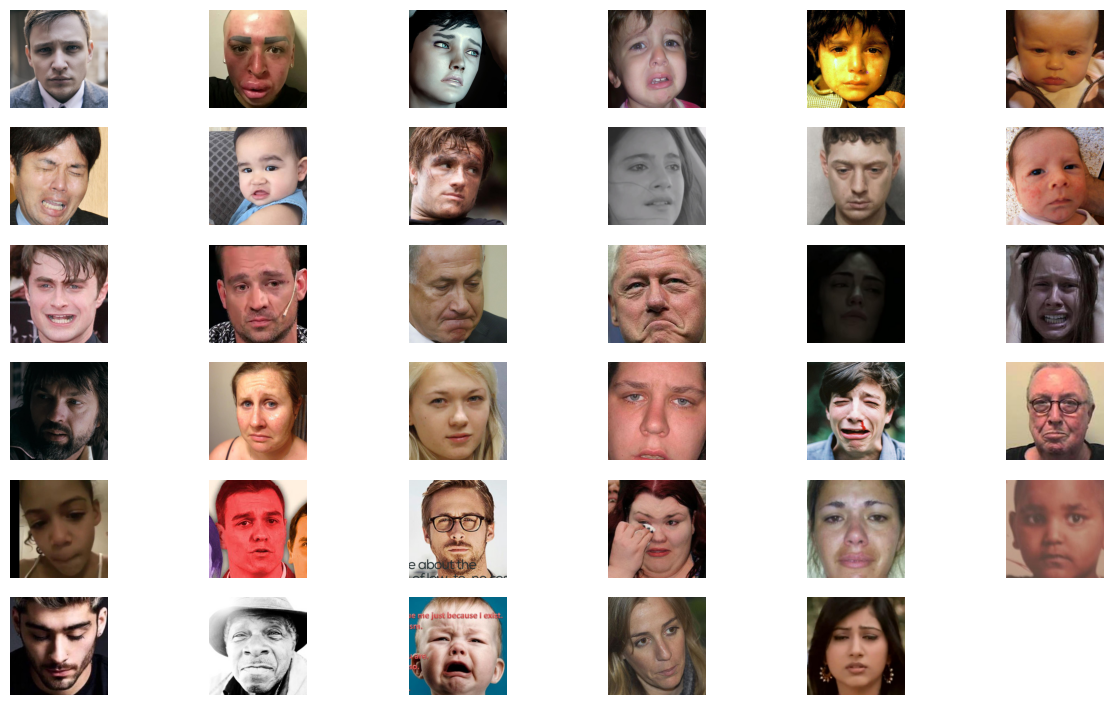

In [133]:
dfangryET = dfET.loc[dfET['GTExpression'] == 2].reset_index(drop='True')
dfangryBV = dfBV.loc[dfBV['GTExpression'] == 2].reset_index(drop='True')

plt.figure(figsize=(15,15))
for i in range(dfangryET['ImageID'].size):
    plt.subplot(10,5,i+1)
    name = dfangryET['ImageID'][i]
    im = Image.open(ETpath+'\\'+name)
    plt.imshow(im)
    plt.axis('off')
plt.show()

plt.figure(figsize=(15,15))
for i in range(dfangryBV['New_name'].size):
    plt.subplot(10,6,i+1)
    name = dfangryBV['New_name'][i]
    im = Image.open(BVpath+'\\'+name)
    plt.imshow(im)
    plt.axis('off')
plt.show()

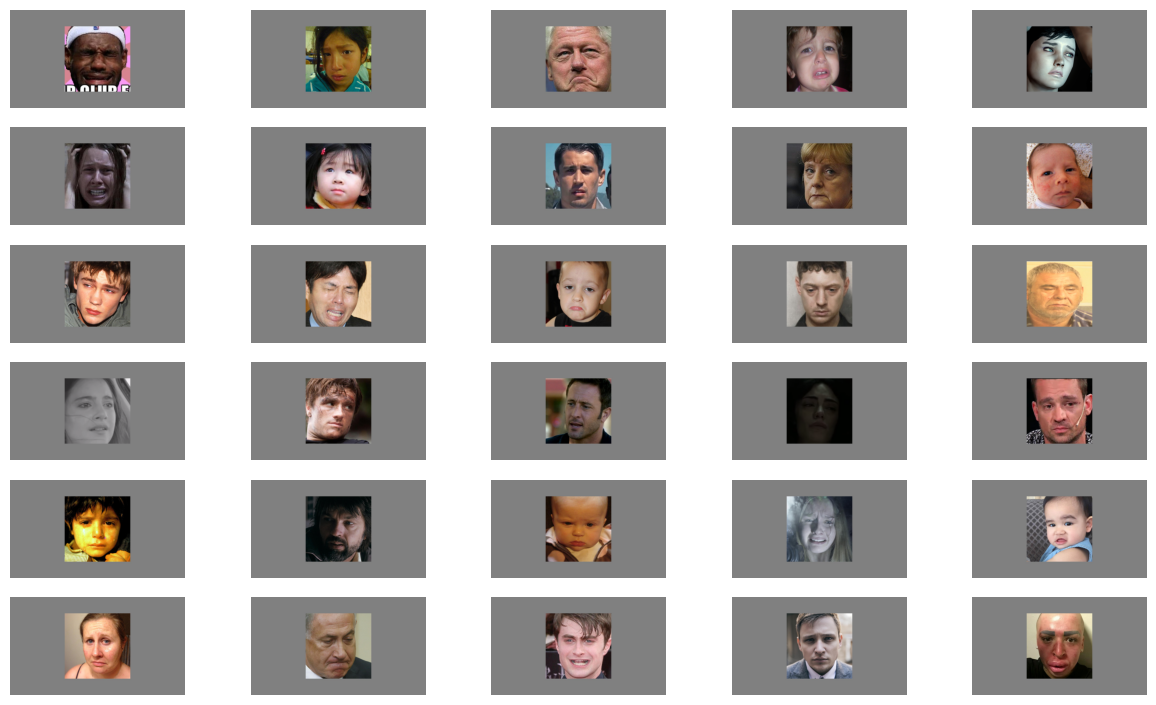

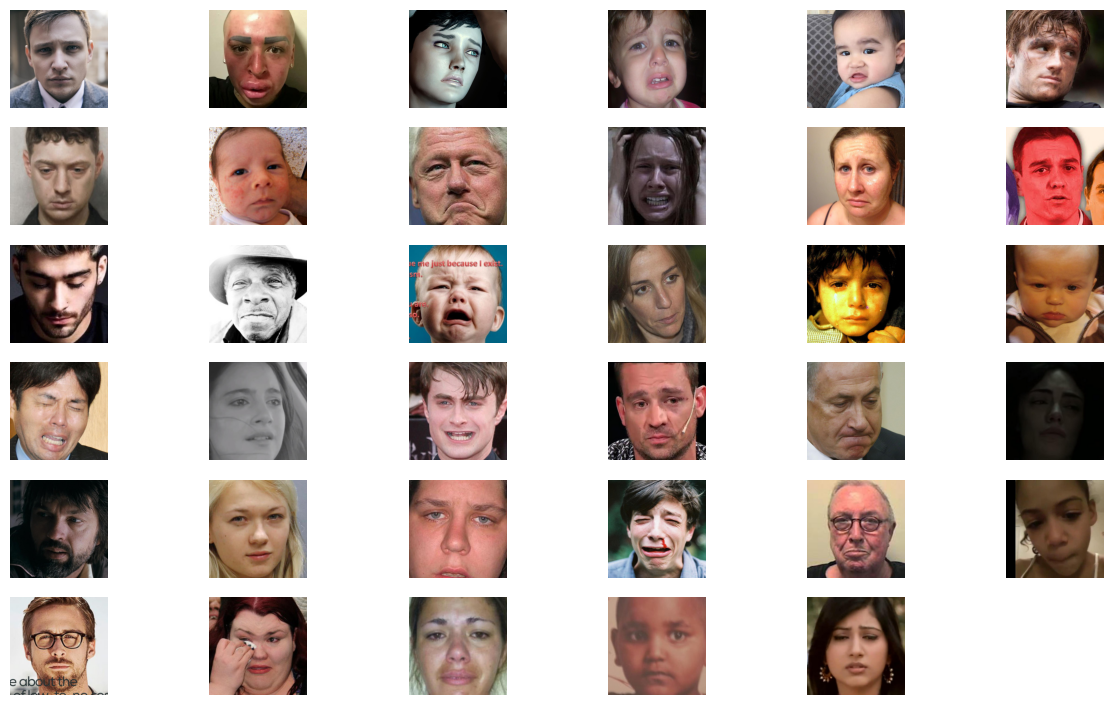

In [132]:
dfangryETu = dfETu.loc[dfETu['GTExpression'] == 2].reset_index(drop='True')
dfangryBVu = dfBVu.loc[dfBVu['GTExpression'] == 2].reset_index(drop='True')

plt.figure(figsize=(15,15))
for i in range(dfangryETu['ImageID'].size):
    plt.subplot(10,5,i+1)
    name = dfangryETu['ImageID'][i]
    im = Image.open(ETpath+'\\'+name)
    plt.imshow(im)
    plt.axis('off')
plt.show()

plt.figure(figsize=(15,15))
for i in range(dfangryBVu['New_name'].size):
    plt.subplot(10,6,i+1)
    name = dfangryBVu['New_name'][i]
    im = Image.open(BVpath+'\\'+name)
    plt.imshow(im)
    plt.axis('off')
plt.show()

In [134]:
df_test1 = df_labels.loc[df_labels['GTExpression']==2]
print(df_test1['ImageID'].size)
df_test2 = df_labels_untouched.loc[df_labels_untouched['GTExpression']==2]
print(df_test2['ImageID'].size)

45
46


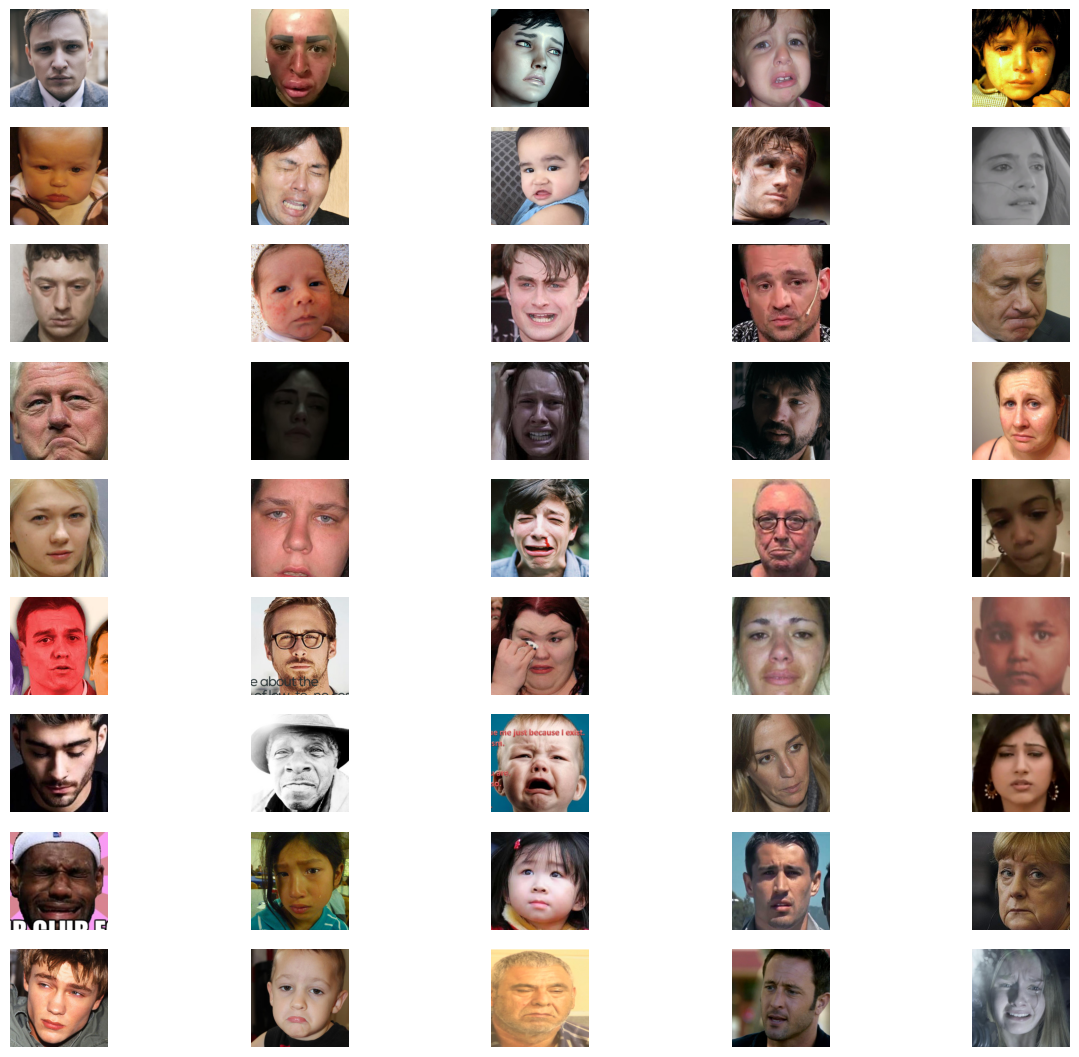

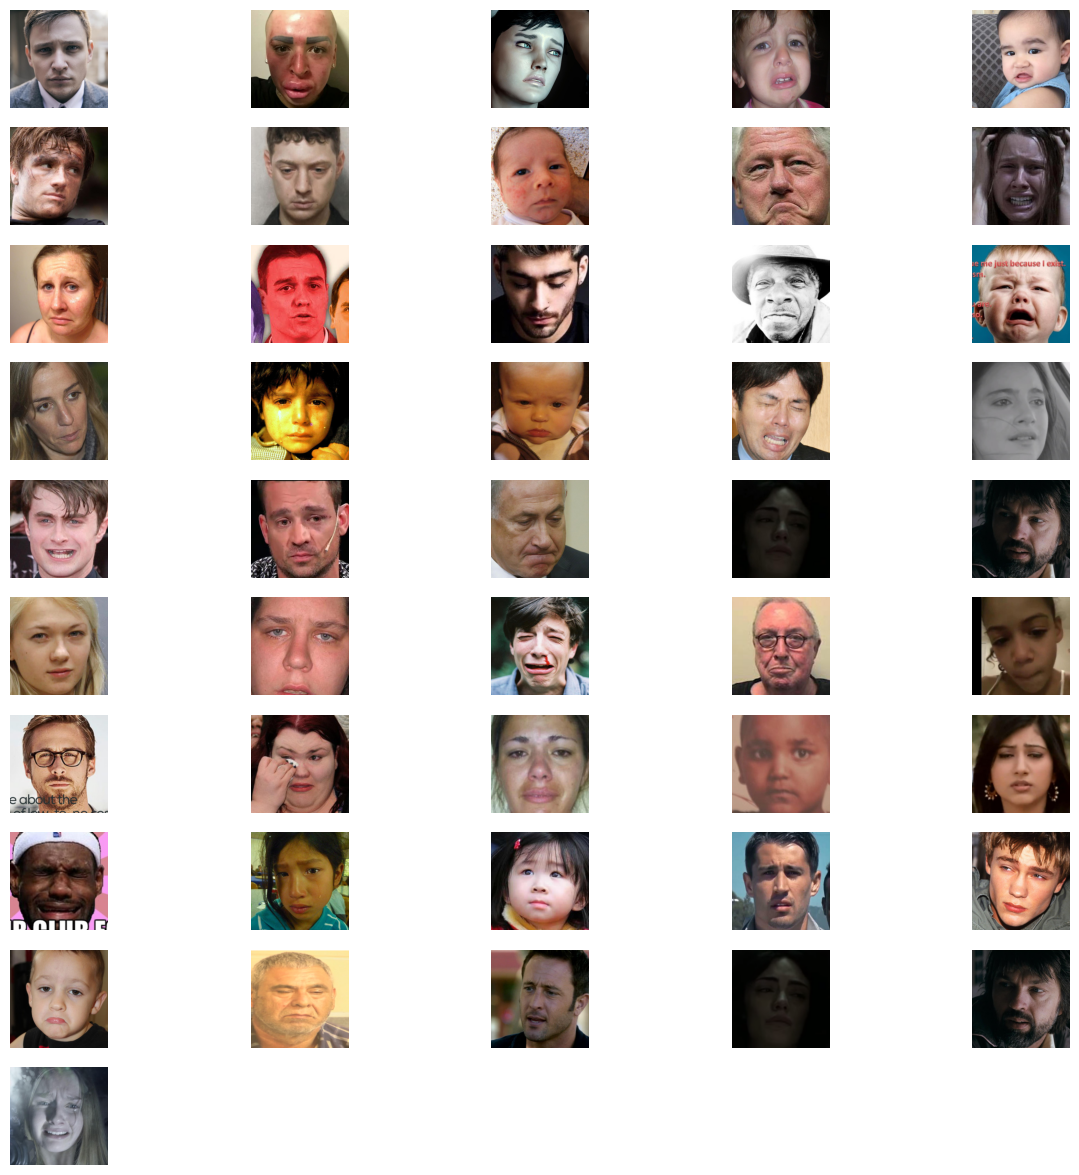

In [145]:
dfangryAll1 = df_test1.loc[df_test1['GTExpression'] == 2]
dfangryAll2 = df_test2.loc[df_test2['GTExpression'] == 2]

k=0
m=0

plt.figure(figsize=(15,15))
for idx in dfangryAll1.index:
    plt.subplot(10,5,k+1)
    name = dfangryAll1['ImageID'][idx]
    im = imgs[idx]
    plt.imshow(im)
    plt.axis('off')
    k+=1
plt.show()

plt.figure(figsize=(15,15))
for idx in dfangryAll2.index:
    plt.subplot(10,5,m+1)
    name = dfangryAll2['ImageID'][idx]
    im = imgs_untouched[idx]
    plt.imshow(im)
    plt.axis('off')
    m+=1
plt.show()